<a href="https://colab.research.google.com/github/olesyamba/Risk_analysis/blob/main/Credit_Risk_4_Correlation_and_Portfolio_Credit_Risk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Модель портфельного кредитного риска

Функция (случайная) кредитных потерь по портфелю, состоящему из $N$ кредитов:

$$L^P(\tau) = \sum_{n = 1,\ldots, N} [I(\tau_n< t+h) \cdot EAD_n(\tau) \cdot LGD_n(\tau)],$$

- В портфеле много различных по масштабам и характеру EAD контрактов
-
- Дефолты зависимы, и чем больше, тем больше при прочих равных потенциал потерь по портфелю и выше портфельные риски:
  - эмпирически оценить структуру зависимости дефолтов из статистики дефолтов весьма непростая статистическая задача - практически безнадежная учитывая потребность в объемах и характере данных;
  - требуется модель, при этом обычно проще построить модель, которая будет описывать структуру зависимости факторов кредитоспособности заемщиков (или групп таковых) между собой;
  - корреляция дефолтов является следствием этой модели.



## 4.1 Пороговая модель дефолта (threshold model) - положена в основе Basel II (сейчас уже IV)

**Смоделируем процесс дефолта**

Пусть дефолт происходит, когда финансовое состояние заемщика "пробивает" некоторый уровень.

Будем моделировать состояние заемщика переменной $X \sim N(0,1)$ и будем говорить, что дефолт случается тогда, когда $X < DB$, где $DB$ (default boundary) - порог дефолта.

Пример: если $PD = 2\%$,  тогда $DB = N^{-1}(0.02)$ - квантиль нормального распределения.

Интерпретации для $X$:

 - нормированные доходности активов компании;
 - стандартизованный скоринговый балл для физ.лица;
 - т.д.



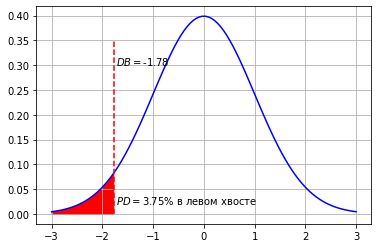

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

PD = 0.0375
DB = ss.norm.ppf(PD)

x = np.linspace(-3, 3, 100)

plt.fill_between(x, ss.norm.pdf(x), 0, where=(x<DB), color = 'red')
plt.plot(x, ss.norm.pdf(x),'-b', label = 'Распределение X')
plt.plot([DB, DB], [0, 0.35], '--r', label = 'Порог дефолта')
plt.text(DB + 0.04, 0.30, r'$DB = ${:.2f}'.format(DB))
plt.text(DB + 0.04, 0.02, r'$PD = ${:.2%} в левом хвосте'.format(PD))
plt.grid()

## 4.2 Корреляции дефолтов в пороговой модели

Рассмотрим двух заемщиков с показателями кредитного качества $X_1$ и $X_2$. Оба распределены стандартно нормально и пусть показатели коррелированы с коэффициентом $\rho \geq 0$ (почему так???).

Факторная модель:

$$X_1 = \sqrt{\rho}Y + \sqrt{(1 - \rho)} e_1$$
$$X_2 = \sqrt{\rho}Y + \sqrt{(1 - \rho)} e_2,$$

где $Y$ - общий (возможно для всего рынка/экономики) фактор риска, $e_1, e_2$ - индивидуальные риски заемщиков (некоррелированы между собой и с общим фактором). Все факторы имеют стандартное нормальное распределение.

$\sqrt{\rho}$ - чувствительность к общеэкономическому фактору или коэффициент корреляции с ним.

Одинаковые $\rho$ говорят о том, что заемщики относятся к одной группе по какому-то принципу:

- отраслевой,
- географический,
- рейтинговый и т.п.

Для разных $\rho_1$ и $\rho_2$, корреляция показателей кредитного качества будет равна $\sqrt{\rho_1 \rho_2}$.



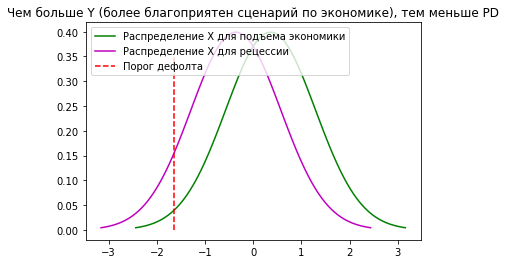

In [ ]:
import numpy as np

rho = 0.13

Y_1 = 1
Y_2 = -1

x = np.linspace(-3, 3, 100)

PD = 0.05
DB = ss.norm.ppf(PD)

# plt.fill_between(x, ss.norm.pdf(x), 0, where=(x<DB), color = 'red')
plt.plot(np.sqrt(rho)*Y_1 + np.sqrt(1 - rho)*x, ss.norm.pdf(x),'-g', label = 'Распределение X для подъема экономики')
plt.plot(np.sqrt(rho)*Y_2 + np.sqrt(1 - rho)*x, ss.norm.pdf(x),'-m', label = 'Распределение X для рецессии')
plt.plot([DB, DB], [0, 0.35], '--r', label = 'Порог дефолта')
plt.title('Чем больше Y (более благоприятен сценарий по экономике), тем меньше PD')
plt.legend(loc='upper left' )
plt.show()


In [ ]:
#1
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

PD_A = 0.0102
PD_B = 0.0427
DB_A = ss.norm.ppf(PD_A)
DB_B = ss.norm.ppf(PD_B)
print(DB_A, DB_B)

-2.3189084659001673 -1.7201784995140668


In [ ]:
#2
import numpy as np

rho = 0.09

Y_1 = 0.2

e = np.random.normal(0, 1, [10000000, 2])
x = np.sqrt(rho)*Y_1 + np.sqrt(1 - rho)*e

np.quantile(x, 0.0357)

-1.8482335757093156

In [ ]:
#2
import numpy as np

rho = 0.35

Y_1 = -0.23

e = ne = np.random.normal(0, 1, [10000000, 2])
x = np.sqrt(rho)*Y_1 + np.sqrt(1 - rho)*e

np.quantile(x, 0.0631)

-1.3687006741599843

In [ ]:
#4
import pandas as pd

N = 100
M = 10000

np.random.seed(222)
Y = np.random.normal(0,1, [M, 1])
PD_1 = 0.02
PD_2 = 0.03
e_1 = np.random.normal(0, 1, [M, int(N/2)])
e_2 = np.random.normal(0, 1, [M, int(N/2)])
alpha = .995 # Для VaR

def genDefaults(Y, e, rho, PD):
  X = np.sqrt(rho)*Y + np.sqrt(1 - rho)*e
  # np.corrcoef(X.T)

  DB = ss.norm.ppf(PD)
  index = ['Сценарий{}'.format(i) for i in range(1, e.shape[0]+1)]
  columns = ['Заемщик{}'.format(j) for j in range(1, e.shape[1]+1)]
  D_gen =pd.DataFrame((X < DB), index = index, columns = columns)
  return D_gen


Loss_dist_1 = genDefaults(Y, e_1, 0.2, PD_1).sum(axis = 1)
#квантиль по лосс дисту это вар на заданном уровне, решается в две строчки
Loss_dist_2 = genDefaults(Y, e_2, 0.2, PD_2).sum(axis = 1)

Loss_dist = pd.concat([Loss_dist_1, Loss_dist_2], axis = 1)
Loss_dist = Loss_dist.sum(axis = 1)
display(Loss_dist)

EL = Loss_dist.mean(axis=0)
UL = Loss_dist.quantile(alpha, interpolation = 'lower') - EL
print(Loss_dist.quantile(alpha, interpolation = 'lower'))

EL_1 = Loss_dist_1.mean(axis=0)
UL_1 = Loss_dist_1.quantile(alpha, interpolation = 'lower') - EL
print(Loss_dist_1.quantile(alpha, interpolation = 'lower'))

EL_2 = Loss_dist_2.mean(axis=0)
UL_2 = Loss_dist_2.quantile(alpha, interpolation = 'lower') - EL
print(Loss_dist_2.quantile(alpha, interpolation = 'lower'))
print(UL, UL_1 + UL_2, UL_1, UL_2)

Сценарий1        0
Сценарий2        0
Сценарий3        2
Сценарий4        0
Сценарий5        2
                ..
Сценарий9996     1
Сценарий9997     5
Сценарий9998     1
Сценарий9999     0
Сценарий10000    7
Length: 10000, dtype: int64

19
9
12
16.5271 16.0542 6.5271 9.5271


Есть два банка, которые кредитуют заемщиков одинокого кредитного качества с
одинаковым уровнем корреляций дефолтов. Но один банк -  крупный, и его портфель
состоит из 10000 заемщиков; а другой банк - мелкий, и у него только 100 заемщиков.
 PD для всех заемщиков равно 4%, rho = 0.1, размер кредитов у всех заемщиков
 одинаковый, LGD = 100%. Сгенерируйте сценарии дефолтов с помощью кода ниже.
 Для портфелей банков оцените относительные VaR_99% (т.е. в % от объема кредитного портфеля банка).

In [ ]:
#5
#Примечание: ответ округлен до целых долей процента.

import numpy as np

N_1 = 100
N_2 = 10000
M = 10000

np.random.seed(333)
Y = np.random.normal(0,1, [M, 1])
e_1 = np.random.normal(0, 1, [M, N_1])
e_2 = np.random.normal(0, 1, [M, N_2])
PD = 0.04
alpha = 0.99


Loss_dist_small = genDefaults(Y, e_1, 0.1, PD).sum(axis = 1)
Loss_dist_big = genDefaults(Y, e_2, 0.1, PD).sum(axis = 1)
print('VAR_small = {}, VAR_big = {}'.format(Loss_dist_small.quantile(alpha, interpolation = 'lower'), Loss_dist_big.quantile(alpha, interpolation = 'lower')))
EL_small = Loss_dist_small.mean(axis=0)
UL_small = Loss_dist_small.quantile(alpha, interpolation = 'lower') - EL_small
print(EL_small+UL_small)

EL_big = Loss_dist_big.mean(axis=0)
UL_big = Loss_dist_big.quantile(alpha, interpolation = 'lower') - EL_big
print(EL_big+UL_big)


Оцените ожидаемые и непредвиденные потери по портфелю со следующими параметрами:
150 заемщиков, PD для всех заёмщиков одинаково и равно 3.5%, rho = 0.25, экспозиции при дефолте заданы вектором EAD и одинаковы во всех сценариях, LGD распределены равномерно на отрезке [0,1] для каждого заемщика и случайны во всех сценариях.  Уровень надежности для определения непредвиденных потерь 99%.


In [ ]:
#6
import numpy as np

N = 150
M = 10000

np.random.seed(444)
Y = np.random.normal(0,1, [M, 1])
e = np.random.normal(0, 1, [M, N])
EAD = np.random.randint(100,500, [1, N])
LGD =np.random.uniform(0,1,[M, N])
PD = 0.035
alpha = 0.99

Loss_dist= pd.DataFrame(genDefaults(Y, e, 0.25, PD)*EAD*LGD).sum(axis=1)
print(Loss_dist)
print('VAR_ = {}'.format(Loss_dist.quantile(alpha, interpolation = 'lower')))
EL = Loss_dist.mean(axis=0)
UL = Loss_dist.quantile(alpha, interpolation = 'lower') - EL
print(EL, UL, EL+UL)



Сценарий1         474.955382
Сценарий2           0.000000
Сценарий3           0.000000
Сценарий4           0.000000
Сценарий5         997.014093
                    ...     
Сценарий9996       66.665759
Сценарий9997        0.000000
Сценарий9998        0.000000
Сценарий9999     1227.914328
Сценарий10000    3759.361181
Length: 10000, dtype: float64
VAR_ = 4939.0776273272
740.4041700097341 4198.673457317466 4939.0776273272


Портфель банка очень крупный и однородный, т.е.:

- безусловная PD = 2% всех заемщиков одинакова,
- ρ = 0.2 для всех заемщиков,
- LGD = 100%,
- EAD одинаковы и каждый кредит бесконечно мал по сравнению с объемом всего портфеля.  

Чему равен относительный VaR 99% для такого кредитного портфеля?

In [ ]:
import numpy as np

N = 150
M = 10000

Y = np.random.normal(0,1, [M, 1])
e = np.random.normal(0, 1, [M, N])
EAD = np.array([1]*N)

PD = 0.02
alpha = 0.99

Loss_dist= pd.DataFrame(genDefaults(Y, e, 0.2, PD)*EAD*100).sum(axis=1)
print('VAR_ = {}'.format(Loss_dist.quantile(alpha, interpolation = 'lower')/N))
EL = Loss_dist.mean(axis=0)
UL = Loss_dist.quantile(alpha, interpolation = 'lower') - EL
print(EL, UL, EL+UL)




VAR_ = 13.333333333333334
293.85 1706.15 2000.0


In [ ]:
# Рассмотрим несколько сценариев и
Y = np.random.normal(0,1, [100000, 1])
e = np.random.normal(0, 1, [100000, 2])

X = np.sqrt(rho)*Y + np.sqrt(1 - rho)*e

DB_1 = -1
DB_2 = -0.5

DB = [DB_1, DB_2]
print('Пороги дефолтов по PD:\n',DB)
print('\n Сценарии по показателю кредитного качества :\n', X[:10,:])
print('\n Сценарии по дефолтам:\n',(X < DB)[:10,:])

Пороги дефолтов по PD:
 [-1, -0.5]

 Сценарии по показателю кредитного качества :
 [[-0.81290274  2.20542588]
 [-0.02853092 -0.14875856]
 [ 0.80976744  0.35407808]
 [-0.6111796   0.26979896]
 [ 0.64153219 -0.59592357]
 [ 2.37743621 -0.44487712]
 [-0.37427895  0.32431374]
 [ 1.88339305 -1.35245098]
 [-0.446501    0.3616353 ]
 [ 0.90460258 -0.71035094]]

 Сценарии по дефолтам:
 [[False False]
 [False False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False  True]]


## 4.3 Модель генерации коррелированных дефолтов

Будем генерировать матрицу дефолтов следующего вида :

| | Заемщик 1 | Заемщик 2  | ...| Заемщик N|
|:-------|:-------|:-------|:-------|:-------|
| **Сценарий 1**| 1 | 1 | ...|0 |
|**Сценарий 2** | 0 | 1 |...| 1|
|...|...|...|...|...|
|**Сценарий M**| 0 | 0 |...| 1|

Рассмотрим N заемщиков с одинаковым рейтингом, т.е. с одинаковыми $PD$.

$DB$ не наблюдается, но его можно вычислить из оценки $PD$.

,Заемщик1,Заемщик2,Заемщик3,Заемщик4,Заемщик5,Заемщик6,Заемщик7,Заемщик8,Заемщик9,Заемщик10,...,Заемщик491,Заемщик492,Заемщик493,Заемщик494,Заемщик495,Заемщик496,Заемщик497,Заемщик498,Заемщик499,Заемщик500
Сценарий1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Сценарий9996,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Сценарий9997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Сценарий9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
Сценарий9999,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


,Заемщик1,Заемщик2,Заемщик3,Заемщик4,Заемщик5,Заемщик6,Заемщик7,Заемщик8,Заемщик9,Заемщик10,...,Заемщик491,Заемщик492,Заемщик493,Заемщик494,Заемщик495,Заемщик496,Заемщик497,Заемщик498,Заемщик499,Заемщик500
Сценарий1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Сценарий9996,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Сценарий9997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Сценарий9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
Сценарий9999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Заемщик1,Заемщик2,Заемщик3,Заемщик4,Заемщик5,Заемщик6,Заемщик7,Заемщик8,Заемщик9,Заемщик10,...,Заемщик491,Заемщик492,Заемщик493,Заемщик494,Заемщик495,Заемщик496,Заемщик497,Заемщик498,Заемщик499,Заемщик500
Сценарий1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий5,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Сценарий9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий9999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


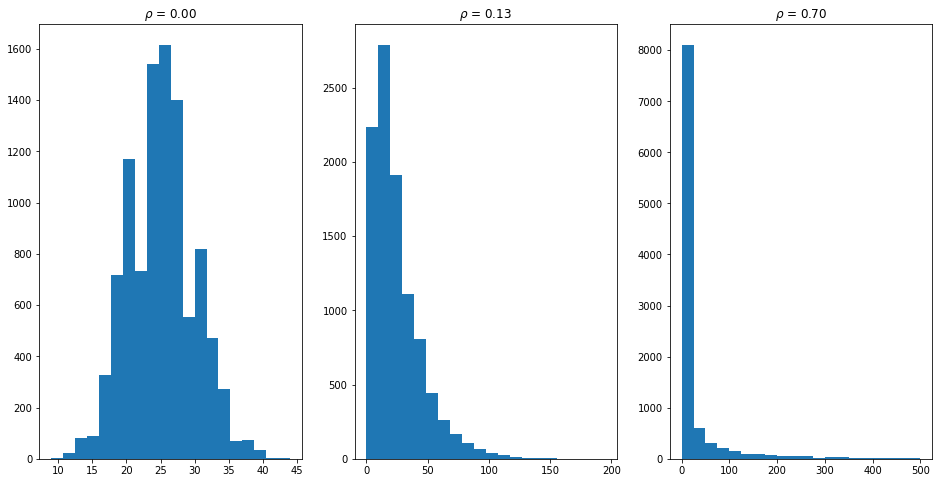

In [ ]:
import pandas as pd

N = 500
PD = 0.05
rho = 0.13
M = 10000

Y = np.random.normal(0,1, [M, 1])
e = np.random.normal(0, 1, [M, N])

def genDefaults(Y, e, rho, PD):
  X = np.sqrt(rho)*Y + np.sqrt(1 - rho)*e
  # np.corrcoef(X.T)

  DB = ss.norm.ppf(PD)
  index = ['Сценарий{}'.format(i) for i in range(1, e.shape[0]+1)]
  columns = ['Заемщик{}'.format(j) for j in range(1, e.shape[1]+1)]
  D_gen =pd.DataFrame((X < DB), index = index, columns = columns)
  display(D_gen)
  return D_gen

# Пусть EAD = 1 и LGD = 1 для всех заемщиков, тогда распределение убытков совпадает с распределение числа дефолтов

rho_1 = 0.0
rho_2 = 0.13
rho_3 = 0.7

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.hist(genDefaults(Y, e, rho_1, PD).sum(axis = 1), 20)
plt.title(r'$\rho$ = {:.2f}'.format(rho_1))
plt.subplot(1,3,2)
plt.hist(genDefaults(Y, e, rho_2, PD).sum(axis = 1), 20)
plt.title(r'$\rho$ = {:.2f}'.format(rho_2))
plt.subplot(1,3,3)
plt.hist(genDefaults(Y, e, rho_3, PD).sum(axis = 1), 20)
plt.title(r'$\rho$ = {:.2f}'.format(rho_3))
plt.show()

## 4.4 Распределение убытков по портфелю и меры риска

При оценке рисков на распределении убытков выделяют ожидаемые убытки (EL, expected losses) и непредвиденные потери (UL, unexpected losses).

$$EL = E(Loss)$$
$$UL = VaR_{\alpha}(Loss) - EL$$

$EL$ - обычные издержки ведения бизнеса и покрывются за счет резервов (включаются в процентную ставку и переносятся на заемщика)
$UL$ - покарываются капиталом за счет собственных средств кредитора.


,Заемщик1,Заемщик2,Заемщик3,Заемщик4,Заемщик5,Заемщик6,Заемщик7,Заемщик8,Заемщик9,Заемщик10,...,Заемщик91,Заемщик92,Заемщик93,Заемщик94,Заемщик95,Заемщик96,Заемщик97,Заемщик98,Заемщик99,Заемщик100
Сценарий1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Сценарий3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Сценарий4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Сценарий9996,False,False,False,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Сценарий9997,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Сценарий9998,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
Сценарий9999,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


Сценарий1         4
Сценарий2         5
Сценарий3         3
Сценарий4         3
Сценарий5         5
                 ..
Сценарий9996     11
Сценарий9997      2
Сценарий9998      9
Сценарий9999     19
Сценарий10000    17
Length: 10000, dtype: int64

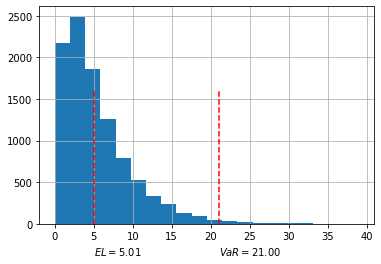

In [ ]:
Loss_dist = genDefaults(Y, e, 0.13, PD).sum(axis = 1)
display(Loss_dist)

alpha = .99 # Для VaR

EL = Loss_dist.mean(axis=0)
UL = Loss_dist.quantile(.99, interpolation = 'lower') - EL

n, _, _ = plt.hist(Loss_dist, 20)
plt.plot([EL, EL], [0, 1600], '--r', label = 'EL')
plt.plot([EL + UL, EL + UL], [0, 1600], '--r', label = 'VaR')
plt.text(EL + 0.04, -0.15*n.max(), r'$EL = ${:.2f}'.format(EL))
plt.text(EL+ UL + 0.04, -0.15*n.max(), r'$VaR = ${:.2f}'.format(EL+UL))
plt.grid()
plt.show()

## 4.5 Откуда взять PD для модели?

$PD$ в изученной моделе имеет смысл средней долгосрочной PD (TTC, Through-the-Cycle).

Ключевой нюанс заключается в выборе статистики для ее вычисления:  смешиваются наблюдения за дефолтами из разных лет (из разных состояний экономики, в разные фазы экономического цикла):
  - например, имеется статистика за 10 лет;
  - история разбивается на 10 годвых интервалов;
  - за каңдый год строится своя статистика дефолтов (наприме, таблица [N, D, S]);
  - все данные объединяются в одну таблицу;
  - по ней оценивается однолетняя вероятность дефолта;
  - результирующая оценка является средней вероятностью дефолта за период.

Пример на двух годах:

*2010*

| Rating | N | D  | S|
|:-------|:-------|:-------|:-------|
| R1| 10 | 0 | 10 |
|R2 | 20 | 1 | 19|

*2011*

| Rating | N | D  | S|
|:-------|:-------|:-------|:-------|
| R1| 10 | 1 | 9 |
|R2 | 19 | 2 | 17|


Складваем соответствующеи компоненты таблицы

*2010-2011*

| Rating | N | D  | S|
|:-------|:-------|:-------|:-------|
| R1| 20 | 1 | 19 |
|R2 | 39 | 3 | 36|

**Примечения**:

Конечно, при работе с выборкой требуется и балансирование выборок в каждом году и решение других вопросов статистики, в данном случае это ограничение исследования

**Выбор подхода оценки PD**

Второстепенен - является результатом предпочений специалиста по рискам:
 - эмпирические частоты,
 - матрицы переходных вероятностей и т.д.




## 4.6 Асимптотическая (упрощенная) формула для крупного однородного портфеля (Базельский требования по капиталу)

Формулы выражают потери на 1 д.е.  

$$EL =   LGD\cdot PD$$

$$VaR_{\alpha} = LGD \cdot N \left(\frac{N^{-1}(PD) - \sqrt{\rho}\cdot N^{-1}(1 - \alpha)}{\sqrt{1 - \rho}}\right) $$

$N \left(\frac{N^{-1}(PD) - \sqrt{\rho}\cdot N^{-1}(1 - \alpha)}{\sqrt{1 - \rho}}\right)$ -  вероятность дефолта в неблагоприятном экономическом сценарии на уровне надежности VaR.

$N^{-1}(PD)$ - порогов дефолта для данной группы заемшиков

$\sqrt{\rho}\cdot N^{−1}(1−α)$ - как близко к порогу сдвигает заемщика макроэкономический сценарий на уровне VaR.



## 4.7 Модель LGD (задаем экзогенно)

Варианты:

 - $ LGD \sim U_{0,1}$
 - $ LGD \sim  Beta(α, β)$,
 - $ LGD \sim K(α, β) $, [подробнее на Wiki](https://en.wikipedia.org/wiki/Kumaraswamy_distribution)

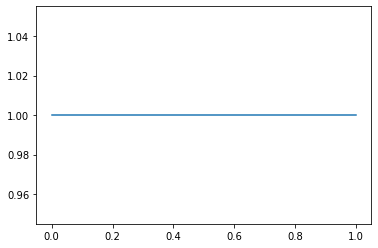

In [ ]:
# Примеры:
import matplotlib.pyplot as plt
import numpy as np

x = np. linspace(0, 1, 20)

plt.plot(x, ss.beta.pdf(x, 1, 1))